# Temp notebook

This notebook is used to run temporary python codes to analyze the data.

In [1]:
import numpy as np
import pandas as pd
import json 
import seaborn as sns

from matplotlib import pyplot as plt

load data:

In [2]:
data_all = {}
data_cv = {}
data_rate = {}
data_sync = {}

gex = [0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.0010, 0.0011, 0.012, 0.0013]#, 0.0014, 0.0015]
amp = [0.12, 0.14, 0.16, 0.18, 0.20]

for j, g in enumerate(gex):
    j+=1
    for i, a in enumerate(amp):
        try:
            f = open(f'../data/v{j}_batch0/v{j}_batch0_0_{i}_data.json')
            cv = open(f'../data/v{j}_batch0/v{j}_batch0_0_{i}_CV.json')
            rate = open(f'../data/v{j}_batch0/v{j}_batch0_0_{i}_rate.json')
            sync = open(f'../data/v{j}_batch0/v{j}_batch0_0_{i}_sync.json')

            data_all[f'{g}_{a}'] = json.load(f)
            data_cv[f'{g}_{a}'] = json.load(cv)
            data_rate[f'{g}_{a}'] = json.load(rate)
            data_sync[f'{g}_{a}'] = json.load(sync)
            print(f'read--> {j}:{g} | {i}:{a}')
        except:
            pass

read--> 1:0.0005 | 0:0.12
read--> 1:0.0005 | 1:0.14
read--> 1:0.0005 | 2:0.16
read--> 1:0.0005 | 3:0.18
read--> 1:0.0005 | 4:0.2
read--> 2:0.0006 | 0:0.12
read--> 2:0.0006 | 1:0.14
read--> 2:0.0006 | 2:0.16
read--> 2:0.0006 | 3:0.18
read--> 2:0.0006 | 4:0.2
read--> 3:0.0007 | 0:0.12
read--> 3:0.0007 | 1:0.14
read--> 3:0.0007 | 2:0.16
read--> 3:0.0007 | 3:0.18
read--> 3:0.0007 | 4:0.2
read--> 4:0.0008 | 0:0.12
read--> 4:0.0008 | 1:0.14
read--> 4:0.0008 | 2:0.16
read--> 4:0.0008 | 3:0.18
read--> 4:0.0008 | 4:0.2
read--> 5:0.0009 | 0:0.12
read--> 5:0.0009 | 1:0.14
read--> 5:0.0009 | 2:0.16
read--> 5:0.0009 | 3:0.18
read--> 5:0.0009 | 4:0.2
read--> 6:0.001 | 0:0.12
read--> 6:0.001 | 1:0.14
read--> 6:0.001 | 2:0.16
read--> 6:0.001 | 3:0.18
read--> 6:0.001 | 4:0.2
read--> 7:0.0011 | 0:0.12
read--> 7:0.0011 | 1:0.14
read--> 7:0.0011 | 2:0.16
read--> 7:0.0011 | 3:0.18
read--> 7:0.0011 | 4:0.2
read--> 8:0.012 | 0:0.12
read--> 8:0.012 | 1:0.14
read--> 8:0.012 | 2:0.16
read--> 8:0.012 | 3:0.18
re

# Potential

In [3]:
def plotPotential(time, voltage, stim_current, title):

    f, (ax0, ax1) = plt.subplots(2,1, figsize=(10,3), gridspec_kw = {'height_ratios':[3, 1]})
    sns.lineplot(x = time, y =voltage, color='black', ax=ax0)
    ax1.plot(time,stim_current, 'gray')

    ax0.set_ylabel('Voltage (mV)')
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.get_xaxis().set_visible(False)


    ax1.plot([0,0],[0,0.15],'k')
    ax1.text(20,0.125,f'{stim_current.max()}nA',va='center')
    ax1.set_ylabel('I (nA)')
    ax1.set_xlabel('t (ms)')

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.title(title)
    plt.tight_layout()

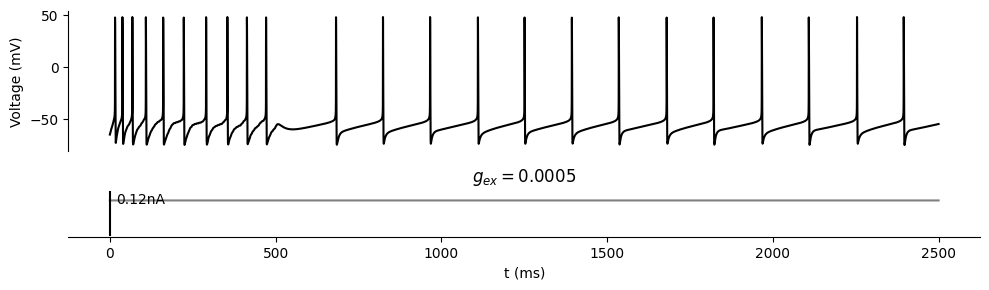

In [4]:
amp = data_all['0.0005_0.12']['simConfig']['IClamp0']['amp']
dur = data_all['0.0005_0.12']['simConfig']['IClamp0']['dur']
start = data_all['0.0005_0.12']['simConfig']['IClamp0']['start']
recordStep = data_all['0.0005_0.12']['simConfig']['recordStep']

voltage = np.array(list(data_all['0.0005_0.12']['simData']['V_soma']['cell_50']))
time = np.array(data_all['0.0005_0.12']['simData']['t'])
stim_current = np.array([0 if x < start/recordStep or x > (dur+start)/recordStep else amp for x in range(0, len(time))])
plotPotential(time,voltage, stim_current, r'$g_{ex} = 0.0005$')

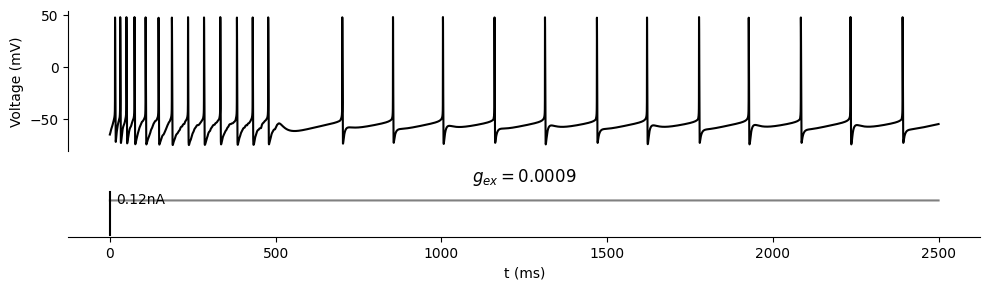

In [5]:
amp = data_all['0.0009_0.12']['simConfig']['IClamp0']['amp']
dur = data_all['0.0009_0.12']['simConfig']['IClamp0']['dur']
start = data_all['0.0009_0.12']['simConfig']['IClamp0']['start']
recordStep = data_all['0.0009_0.12']['simConfig']['recordStep']

voltage = np.array(list(data_all['0.0009_0.12']['simData']['V_soma']['cell_50']))
time = np.array(data_all['0.0009_0.12']['simData']['t'])
stim_current = np.array([0 if x < start/recordStep or x > (dur+start)/recordStep else amp for x in range(0, len(time))])
plotPotential(time,voltage, stim_current, r'$g_{ex} = 0.0009$')

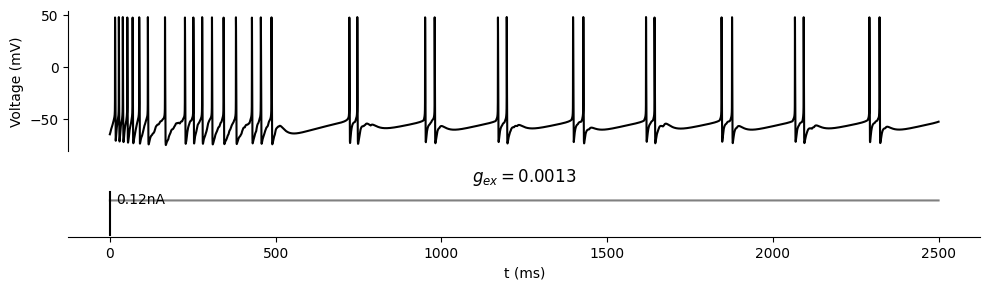

In [6]:
amp = data_all['0.0013_0.12']['simConfig']['IClamp0']['amp']
dur = data_all['0.0013_0.12']['simConfig']['IClamp0']['dur']
start = data_all['0.0013_0.12']['simConfig']['IClamp0']['start']
recordStep = data_all['0.0013_0.12']['simConfig']['recordStep']

voltage = np.array(list(data_all['0.0013_0.12']['simData']['V_soma']['cell_50']))
time = np.array(data_all['0.0013_0.12']['simData']['t'])
stim_current = np.array([0 if x < start/recordStep or x > (dur+start)/recordStep else amp for x in range(0, len(time))])
plotPotential(time,voltage, stim_current, r'$g_{ex} = 0.0013$')

In [7]:
gex = [0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.0010, 0.0011, 0.012, 0.0013]#, 0.0014, 0.0015]
amp = [0.12, 0.14, 0.16, 0.18, 0.20]

avgRate = pd.DataFrame({})
avgRateNet = pd.DataFrame({})
stdRateNet = pd.DataFrame({})
meanCVNet = pd.DataFrame({})
stdCVNet = pd.DataFrame({})
syncNet = pd.DataFrame({})


for g in gex:
    for a in amp:
        avgRate.loc[g,a] = data_all[f'{g}_{a}']['simData']['avgRate']
        avgRateNet.loc[g,a] = np.mean(data_rate[f'{g}_{a}']['statData'][0])
        stdRateNet.loc[g,a] = np.std(data_rate[f'{g}_{a}']['statData'][0])
        meanCVNet.loc[g,a] = np.mean(data_cv[f'{g}_{a}']['statData'][0])
        stdCVNet.loc[g,a] = np.std(data_cv[f'{g}_{a}']['statData'][0])
        syncNet.loc[g,a] = np.mean(data_sync[f'{g}_{a}']['statData'][0])

In [8]:
gex

[0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.012, 0.0013]

In [9]:
gex_labels = [f'{g}'[-2:].replace('0','0.') for g in gex]
print(gex_labels)

['0.5', '0.6', '0.7', '0.8', '0.9', '0.1', '11', '12', '13']


In [10]:
import matplotlib.pyplot as plt
from matplotlib import ticker

def plotheatmap(data,labelCb,interpolation):

    gex_labels = [f'{g}'[-2:].replace('0','0.') for g in data.T.columns]
    gex_labels[-1] = gex_labels[-1]+'x10-3'
    fig, ax = plt.subplots(ncols=1, nrows=1,)
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True))
    ax.set_yticks(list(range(len(data.T.index))), labels=amp[::-1], fontsize=8)
    ax.set_xticks(list(range(len(data.T.columns))), labels=gex_labels, fontsize=8)
    
    im = ax.imshow(data.T[::-1], cmap='gnuplot2', interpolation=interpolation, aspect='auto')

    plt.colorbar(im, label=labelCb)
    plt.xlabel(r'$g_{ex}$', fontsize=14)
    plt.ylabel(r'$I_{ex}$', fontsize=14)

    plt.title(r'Space params of $g_{ex}$ by $I_{ex}$', pad=20)
    plt.show()


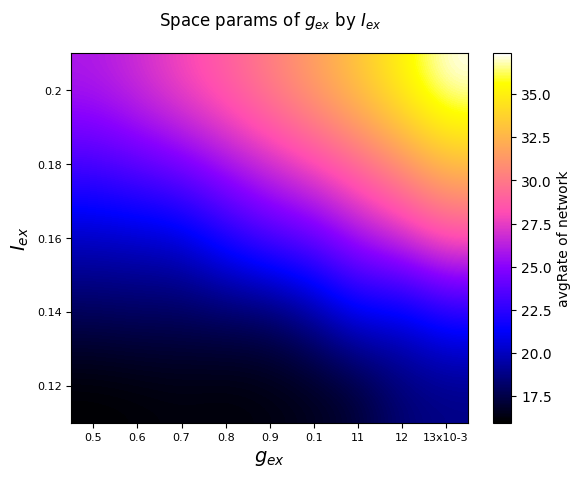

In [11]:
plotheatmap(avgRate, 'avgRate of network', 'bicubic')

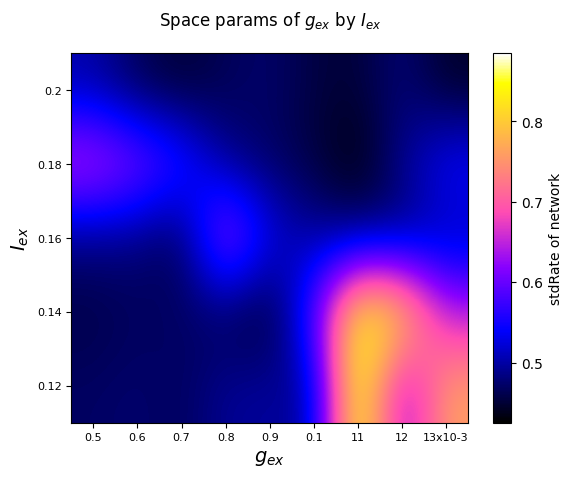

In [12]:
plotheatmap(stdRateNet, 'stdRate of network', 'bicubic')

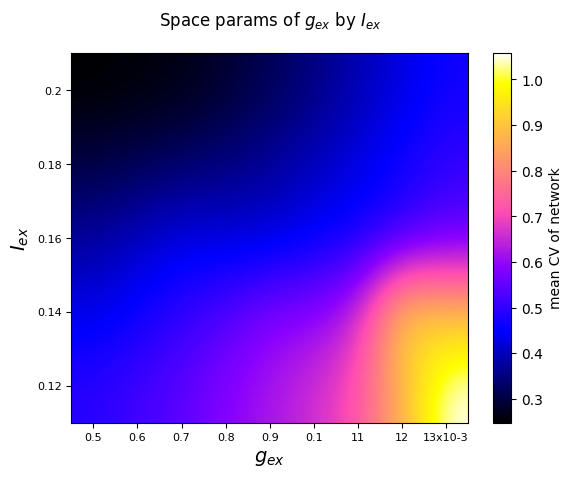

In [13]:
plotheatmap(meanCVNet, 'mean CV of network','bicubic')

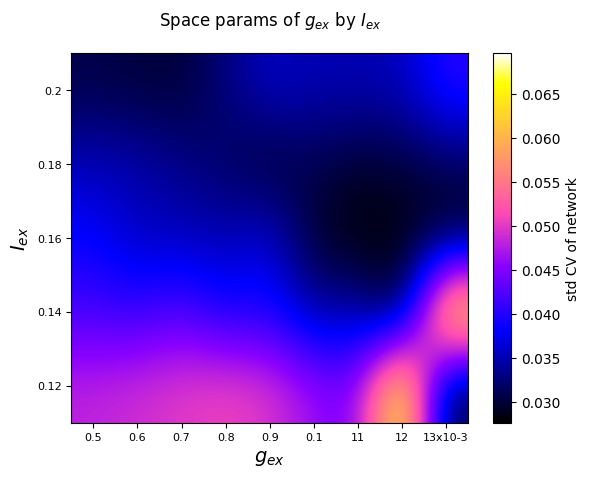

In [14]:
plotheatmap(stdCVNet, 'std CV of network','bicubic')

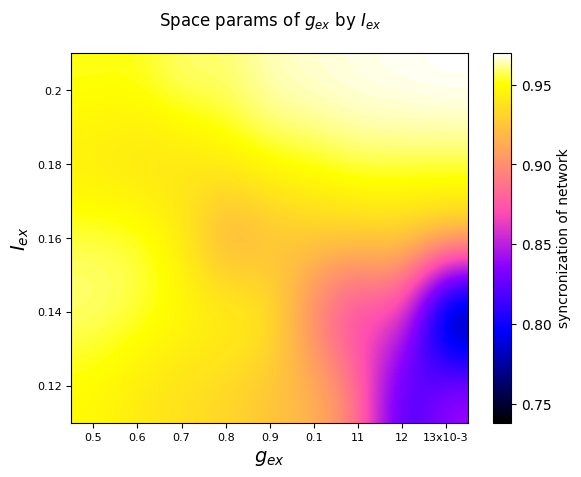

In [15]:
plotheatmap(syncNet, 'syncronization of network','bicubic')